In [13]:
import matplotlib.pyplot as plt # python graphing library
import pandas as pd             # DataFrame programming in python

# allow plots to appear in this notebook
%matplotlib inline              
plt.rcParams['figure.figsize'] = 10, 8 # size of plots

In [3]:
!ls ../..

R         README.md data      python


In [4]:
DATA_PATH = '../../data/dev/'

In [5]:
!ls $DATA_PATH

climatic_variables_longlat_var1000.csv


In [8]:
clim = pd.read_csv(DATA_PATH + 'climatic_variables_longlat_var1000.csv')
clim = clim.iloc[:, 1:]

In [10]:
print(clim.shape)
clim.head()

(999, 682)


,x,y,lon,lat,mask,etopo1,srtm30,mat_slice_msk,vgt_mat_msk,btl_mat_msk,...,btl_vgp_msk.11,vgp_slice_msk.12,vgt_vgp_msk.12,btl_vgp_msk.12,vgp_slice_msk.13,vgt_vgp_msk.13,btl_vgp_msk.13,vgp_slice_msk.14,vgt_vgp_msk.14,btl_vgp_msk.14
0,2690000.0,-4510000,-77.292019,5.124395,1,67,78,25.471111,NaN,NaN,...,NaN,0.130108,NaN,NaN,0.470960,NaN,NaN,0.138894,NaN,NaN
1,2700000.0,-4510000,-77.208582,5.099891,1,61,39,25.745397,NaN,NaN,...,NaN,0.147560,NaN,NaN,0.493110,NaN,NaN,0.147905,NaN,NaN
2,2710000.0,-4510000,-77.125153,5.075297,1,67,52,25.771355,NaN,NaN,...,NaN,0.153884,NaN,NaN,0.488933,NaN,NaN,0.152029,NaN,NaN
3,2720000.0,-4510000,-77.041733,5.050615,1,26,22,26.047372,NaN,NaN,...,NaN,0.160750,NaN,NaN,0.485937,NaN,NaN,0.158797,NaN,NaN
4,2730000.0,-4510000,-76.958322,5.025843,1,43,79,25.815113,NaN,NaN,...,NaN,0.171550,NaN,NaN,0.490959,NaN,NaN,0.168400,NaN,NaN


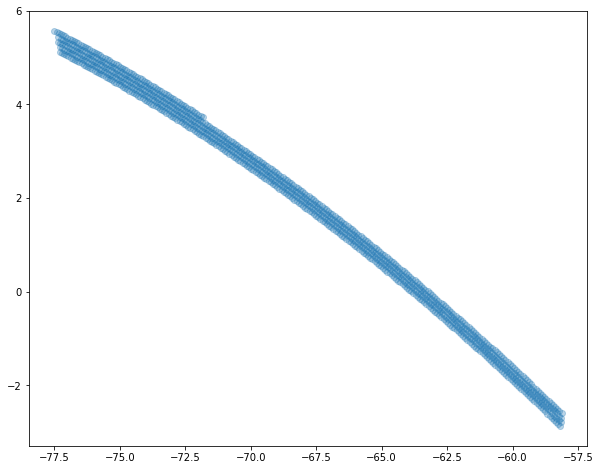

In [17]:
plt.plot(clim.lon, clim.lat, 'o', alpha=0.3);

In [25]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
class BoundingBox:
    def __init__(self, lower_left, upper_right):
        assert type(lower_left) is Point and type(upper_right) is Point
        self.lower_left = lower_left
        self.upper_right = upper_right

In [42]:
# Test
upper_left = Point(-75, -1)
lower_right = Point(-60, 4)
bounding_box = BoundingBox(upper_left, lower_right)

In [45]:
def restrict_to_bounding_box(data, bounding_box, coord_type='lon_lat'):
    '''
    Returns data restricted to rows enclosed in bounding box
    
    Args:
    data: Dataframe with either x and y columns, or lon and lat columns 
          (or both)
    bounding_box: BoundingBox
    coord_type: 'lon_lat' or 'xy' - tells which fields to use to filter 
                data
    
    Returns: DataFrame
    '''
    assert coord_type in ['lon_lat', 'xy']
    x_min = bounding_box.lower_left.x
    y_min = bounding_box.lower_left.y
    x_max = bounding_box.upper_right.x
    y_max = bounding_box.upper_right.y    
    x, y = ('x', 'y') if coord_type == 'xy' else ('lon', 'lat')

    return data[(x_min <= data[x]) & (data[x] <= x_max) & 
                (y_min <= data[y]) & (data[y] <= y_max)]

In [46]:
sample = restrict_to_bounding_box(clim, bounding_box)

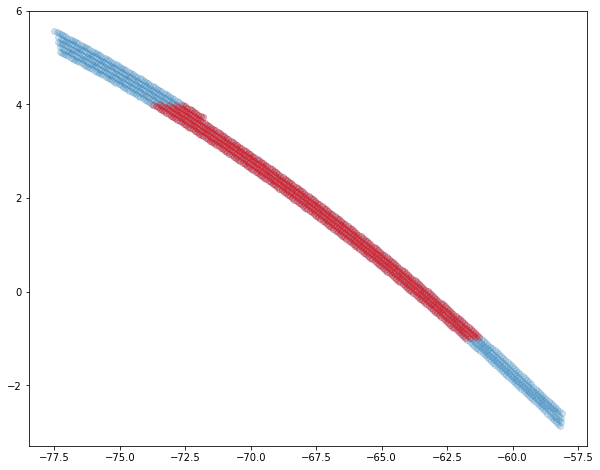

In [47]:
plt.plot(clim.lon, clim.lat, 'o', alpha=0.2);
plt.plot(sample.lon, sample.lat, 'ro', alpha=0.2);

In [ ]:
# TODO csv to matrix